## 3 digits - Merging year and country wise

### Waves 4,5,6

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/data_clean_w456.csv"
)
indexes = pd.read_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/work_quality_indexes_year_country.csv"
)

In [3]:
def convert_to_3_digits(number):
    return int(str(number)[:-1]) if number >= 1000 else number


df["isco"] = df["isco"].apply(lambda x: convert_to_3_digits(x))
indexes["isco"] = indexes["isco"].apply(lambda x: convert_to_3_digits(x))

In [4]:
df = df.merge(indexes, on=["year", "country", "isco"], how="inner")

In [5]:
df

,mergeid,wave,year,age,nb_children,partnerinhh,job_status,eurod,eurodcat,country,...,jqi_working_time_quality,jqi_monthly_earnings_weighted,jqi_skills_discretion_weighted,jqi_social_environment_weighted,jqi_physical_environment_weighted,jqi_intensity_weighted,jqi_prospects_weighted,jqi_working_time_quality_weighted,jqi_sum,jqi_sum_weighted
0,AT-009376-01,4,2011,53.0,2.0,1,Civil servant,0.0,0,Austria,...,99.375000,2255.757532,99.866122,107.927235,125.510628,59.873372,89.017043,142.426610,453.006697,569.372780
1,AT-036427-02,4,2011,54.0,2.0,1,Self-employed,0.0,0,Austria,...,99.375000,2255.757532,99.866122,107.927235,125.510628,59.873372,89.017043,142.426610,453.006697,569.372780
2,AT-011070-01,4,2011,59.0,2.0,1,Civil servant,2.0,0,Austria,...,82.291667,2018.544145,80.457574,79.867051,97.823588,69.414252,74.732197,86.453532,484.894559,557.454009
3,AT-326780-02,4,2011,57.0,2.0,1,Civil servant,5.0,1,Austria,...,82.291667,2018.544145,80.457574,79.867051,97.823588,69.414252,74.732197,86.453532,484.894559,557.454009
4,AT-413796-01,4,2011,55.0,1.0,1,Civil servant,2.0,0,Austria,...,82.291667,2018.544145,80.457574,79.867051,97.823588,69.414252,74.732197,86.453532,484.894559,557.454009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18163,SI-945439-01,6,2015,60.0,0.0,1,Private sector employee,0.0,0,Slovenia,...,96.875000,870.142627,52.528371,68.939004,63.859428,41.073687,60.164953,67.130822,513.128875,348.566187
18164,SI-945439-01,6,2015,60.0,0.0,1,Private sector employee,0.0,0,Slovenia,...,56.750000,3266.650022,117.966099,148.941248,149.266272,104.263986,91.168625,103.583647,486.004163,990.421567
18165,SI-966058-01,6,2015,57.0,2.0,0,Public sector employee,4.0,1,Slovenia,...,76.708333,662.646287,36.340236,60.451077,48.139088,21.415786,38.151373,53.498362,354.668414,135.811686
18166,SI-966058-01,6,2015,57.0,2.0,0,Public sector employee,4.0,1,Slovenia,...,89.389706,659.185057,43.628426,68.433711,61.778573,39.993333,38.737746,63.517250,449.748588,404.636691


In [6]:
df.mergeid.nunique()

5647

In [7]:
df.groupby("country").mergeid.nunique()

country
Austria           310
Belgium           794
Czech Republic    395
Denmark           465
Estonia           683
France            408
Germany           734
Italy             498
Slovenia          351
Spain             688
Switzerland       321
Name: mergeid, dtype: int64

In [8]:
df.groupby("year").mergeid.nunique()

year
2011    2679
2013    3137
2015    3734
Name: mergeid, dtype: int64

In [9]:
df.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w456_year_country.csv",
    index=False,
)

### Some descriptive stats

In [10]:
round(df[["age", "gender", "nb_children", "yrseducation"]].describe(), 2)

,age,gender,nb_children,yrseducation
count,18168.00,18168.00,18168.00,18168.00
mean,56.40,0.53,1.78,13.07
std,3.16,0.50,1.27,4.25
min,50.00,0.00,0.00,0.00
25%,54.00,0.00,1.00,11.00
50%,56.00,1.00,2.00,13.00
75%,59.00,1.00,2.00,16.00
max,65.00,1.00,10.00,39.00


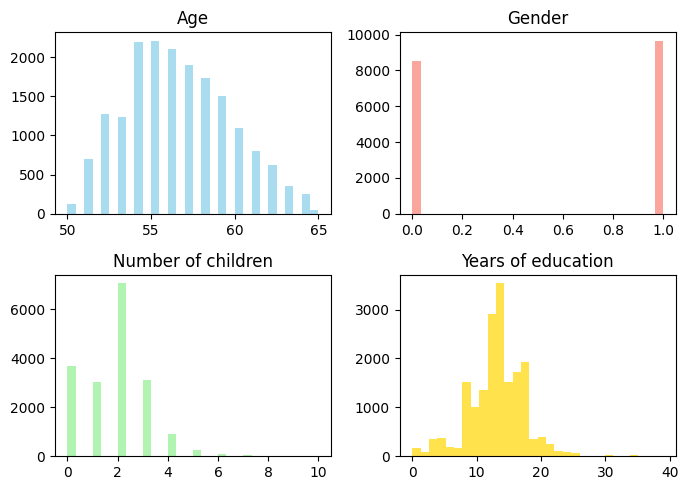

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["age"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Age")

axs[0, 1].hist(df["gender"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Gender")

axs[1, 0].hist(df["nb_children"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Number of children")

axs[1, 1].hist(df["yrseducation"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Years of education")

plt.tight_layout()

plt.show()

In [12]:
round(df["job_status"].value_counts(normalize=True), 2)

job_status
Private sector employee    0.38
Public sector employee     0.23
Employee                   0.21
Self-employed              0.12
Civil servant              0.06
Name: proportion, dtype: float64

In [13]:
round(
    df[
        ["yrscontribution", "retirement_age", "work_horizon", "work_horizon_change"]
    ].describe(),
    2,
)

,yrscontribution,retirement_age,work_horizon,work_horizon_change
count,18168.00,18168.00,18168.00,18168.00
mean,35.92,63.46,7.06,0.18
std,6.02,2.15,3.43,0.50
min,6.00,57.00,0.08,0.00
25%,33.00,62.00,4.17,0.00
50%,36.00,65.00,7.00,0.00
75%,40.00,65.00,10.00,0.08
max,55.00,68.00,17.00,4.00


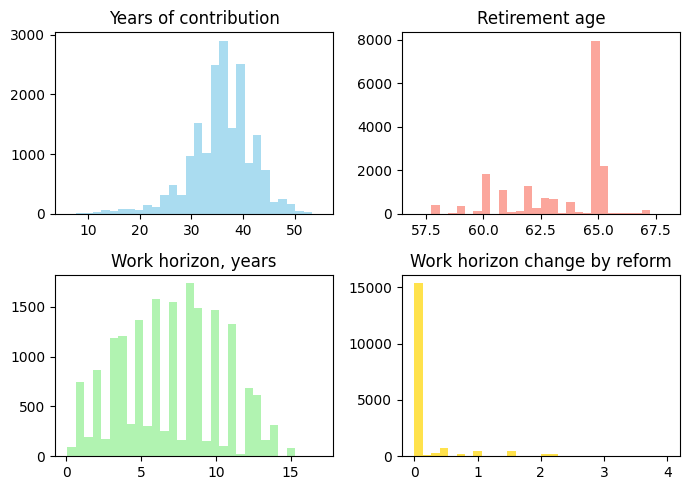

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

axs[0, 0].hist(df["yrscontribution"], bins=30, color="skyblue", alpha=0.7)
axs[0, 0].set_title("Years of contribution")

axs[0, 1].hist(df["retirement_age"], bins=30, color="salmon", alpha=0.7)
axs[0, 1].set_title("Retirement age")

axs[1, 0].hist(df["work_horizon"], bins=30, color="lightgreen", alpha=0.7)
axs[1, 0].set_title("Work horizon, years")

axs[1, 1].hist(df["work_horizon_change"], bins=30, color="gold", alpha=0.7)
axs[1, 1].set_title("Work horizon change by reform")

plt.tight_layout()

plt.show()

In [15]:
round(df["eurodcat"].value_counts(normalize=True), 2)

eurodcat
0    0.81
1    0.19
Name: proportion, dtype: float64

In [16]:
df["eurod"].value_counts()

eurod
0.0     4725
1.0     4441
2.0     3252
3.0     2304
4.0     1514
5.0      889
6.0      506
7.0      312
8.0      116
9.0       72
10.0      30
11.0       7
Name: count, dtype: int64

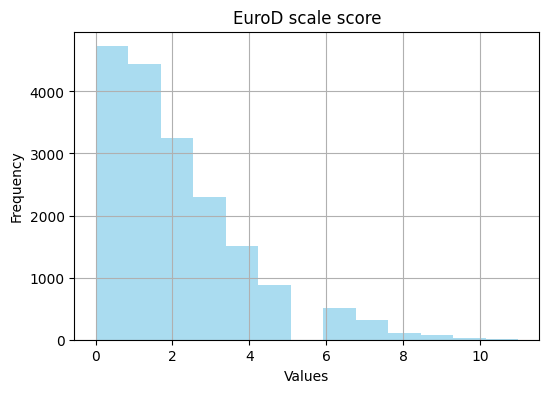

In [17]:
plt.figure(figsize=(6, 4))
plt.hist(df["eurod"], bins=13, color="skyblue", alpha=0.7)
plt.title("EuroD scale score")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [18]:
round(
    df[
        [
            "jqi_monthly_earnings",
            "jqi_skills_discretion",
            "jqi_social_environment",
            "jqi_physical_environment",
            "jqi_intensity",
            "jqi_prospects",
            "jqi_working_time_quality",
        ]
    ].describe(),
    2,
)

,jqi_monthly_earnings,jqi_skills_discretion,jqi_social_environment,jqi_physical_environment,jqi_intensity,jqi_prospects,jqi_working_time_quality
count,18168.00,18168.00,18168.00,18168.00,18168.00,18168.00,18168.00
mean,1573.20,59.91,80.42,84.52,50.55,59.58,87.75
std,692.60,15.22,8.00,10.21,9.52,14.41,11.49
min,39.50,2.33,37.50,25.64,11.63,0.00,7.25
25%,1119.77,48.23,75.39,79.07,44.60,50.00,82.29
50%,1460.56,60.54,80.68,87.61,50.64,60.36,90.62
75%,1875.62,72.26,85.79,91.88,56.10,68.75,96.52
max,12267.43,97.47,100.00,100.00,88.37,100.00,100.00


### Waves 4,5,6 common individuals

In [19]:
df.mergeid.nunique()

5647

In [20]:
unique_mergeid_w4 = set(df[df.wave == 4]["mergeid"].unique())
unique_mergeid_w5 = set(df[df.wave == 5]["mergeid"].unique())
unique_mergeid_w6 = set(df[df.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w5).intersection(
    unique_mergeid_w6
)
len(intersection_ids)

1015

In [21]:
w456_common = df[df["mergeid"].isin(intersection_ids)].reset_index(drop=True)

isco = w456_common["isco"].value_counts().to_frame().reset_index()
isco = isco[isco["count"] >= 10]
w456_common = w456_common[w456_common["isco"].isin(isco["isco"].unique())].reset_index(
    drop=True
)

In [22]:
w456_common.groupby("country").mergeid.nunique()

country
Austria            83
Belgium           214
Czech Republic     61
Denmark           118
Estonia           168
France            127
Germany            21
Italy              68
Slovenia           67
Spain              88
Name: mergeid, dtype: int64

In [23]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [24]:
w456_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w456_year_country_common.csv",
    index=False,
)

### Waves 4 and 6

In [25]:
result = (
    df[df["year"].isin([2013, 2015])]
    .groupby("mergeid")["work_horizon_change"]
    .sum()
    .reset_index()
)
result["year"] = 2015

df = df.drop(columns="work_horizon_change")
df = df.merge(result, on=["mergeid", "year"], how="left")

df["work_horizon_change"] = df["work_horizon_change"].fillna(0)

In [26]:
w46 = df[(df.wave == 4) | (df.wave == 6)].reset_index(drop=True)

In [27]:
w46.mergeid.nunique()

5121

In [28]:
w46.groupby("country").mergeid.nunique()

country
Austria           301
Belgium           719
Czech Republic    362
Denmark           425
Estonia           661
France            393
Germany           586
Italy             456
Slovenia          327
Spain             570
Switzerland       321
Name: mergeid, dtype: int64

In [29]:
w46.groupby("wave").mergeid.nunique()

wave
4    2679
6    3734
Name: mergeid, dtype: int64

In [30]:
w46.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w46_year_country.csv",
    index=False,
)

### Waves 4 and 6 common individuals

In [31]:
unique_mergeid_w4 = set(w46[w46.wave == 4]["mergeid"].unique())
unique_mergeid_w6 = set(w46[w46.wave == 6]["mergeid"].unique())
intersection_ids = unique_mergeid_w4.intersection(unique_mergeid_w6)
len(intersection_ids)

1292

In [32]:
w46_common = w46[w46["mergeid"].isin(intersection_ids)].reset_index(drop=True)

In [33]:
w46_common.groupby("country").mergeid.nunique()

country
Austria           108
Belgium           260
Czech Republic     91
Denmark           130
Estonia           232
France            153
Germany            28
Italy              95
Slovenia           86
Spain             109
Name: mergeid, dtype: int64

In [34]:
# Delete Germany as too few individuals
w456_common = w456_common[w456_common.country != "Germany"].reset_index(drop=True)

In [35]:
w46_common.to_csv(
    "/Users/alexandralugova/Documents/GitHub/MH-old-workers/data/datasets/results/3digits_w46_year_country_common.csv",
    index=False,
)